# Example: Multivariate forecast
--------------------

This example shows how to use ATOM to work with a multivariate time series dataset and exogenous variables.

Import the US Macroeconomic dataset from [sktime.datasets](https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.datasets.load_macroeconomic.html#sktime.datasets.load_macroeconomic). This is a small dataset that measures quarterly macroeconomic data from the United States from 1959Q1 to 2009Q3.

## Load the data

In [1]:
# Import packages
import numpy as np
from sktime.datasets import load_macroeconomic
from atom import ATOMForecaster

In [2]:
# Load the data
X = load_macroeconomic()

print(X.head())

         realgdp  realcons  realinv  realgovt  realdpi    cpi     m1  \
Period                                                                 
1959Q1  2710.349    1707.4  286.898   470.045   1886.9  28.98  139.7   
1959Q2  2778.801    1733.7  310.859   481.301   1919.7  29.15  141.7   
1959Q3  2775.488    1751.8  289.226   491.260   1916.4  29.35  140.5   
1959Q4  2785.204    1753.7  299.356   484.052   1931.3  29.37  140.0   
1960Q1  2847.699    1770.5  331.722   462.199   1955.5  29.54  139.6   

        tbilrate  unemp      pop  infl  realint  
Period                                           
1959Q1      2.82    5.8  177.146  0.00     0.00  
1959Q2      3.08    5.1  177.830  2.34     0.74  
1959Q3      3.82    5.3  178.657  2.74     1.09  
1959Q4      4.33    5.6  179.386  0.27     4.06  
1960Q1      3.50    5.2  180.007  2.31     1.19  


## Analyze the data

In [3]:
# We set the last two columns of the dataset as our target columns
atom = ATOMForecaster(X, y=(-1, -2), verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Multivariate forecast.

Dataset stats ==================== >>
Shape: (203, 12)
Train set size: 163
 --> From: 1959Q1  To: 1999Q3
Test set size: 40
 --> From: 1999Q4  To: 2009Q3
-------------------------------------
Memory: 29.41 kB
Scaled: False
Outlier values: 9 (0.5%)



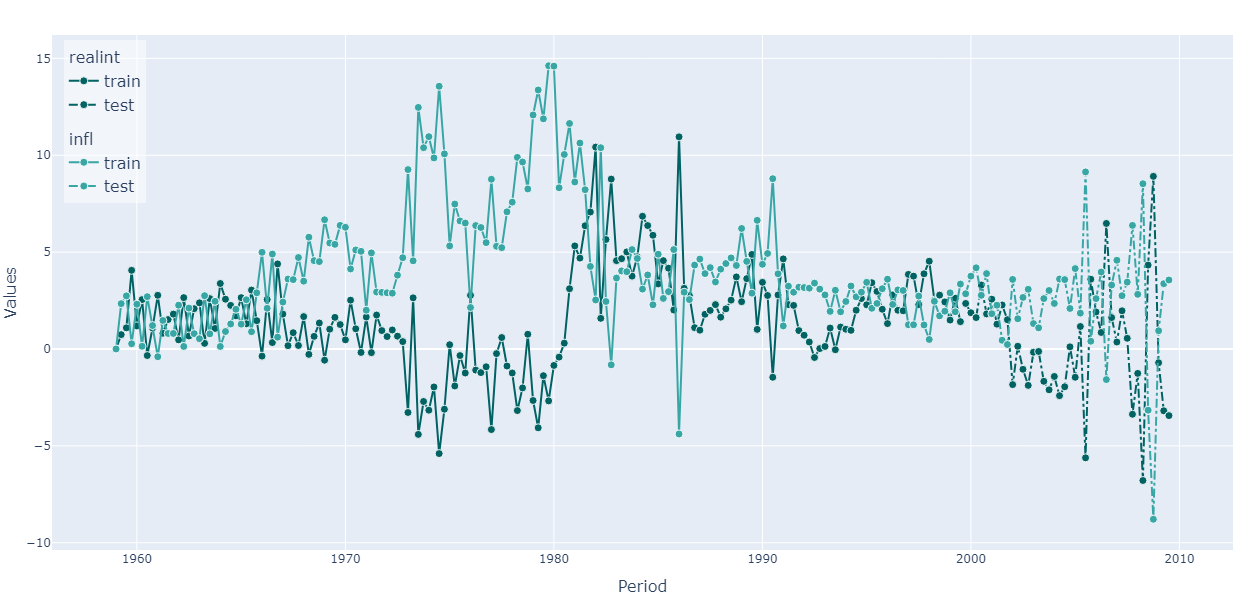

In [4]:
# Examine the dataset
atom.plot_series()

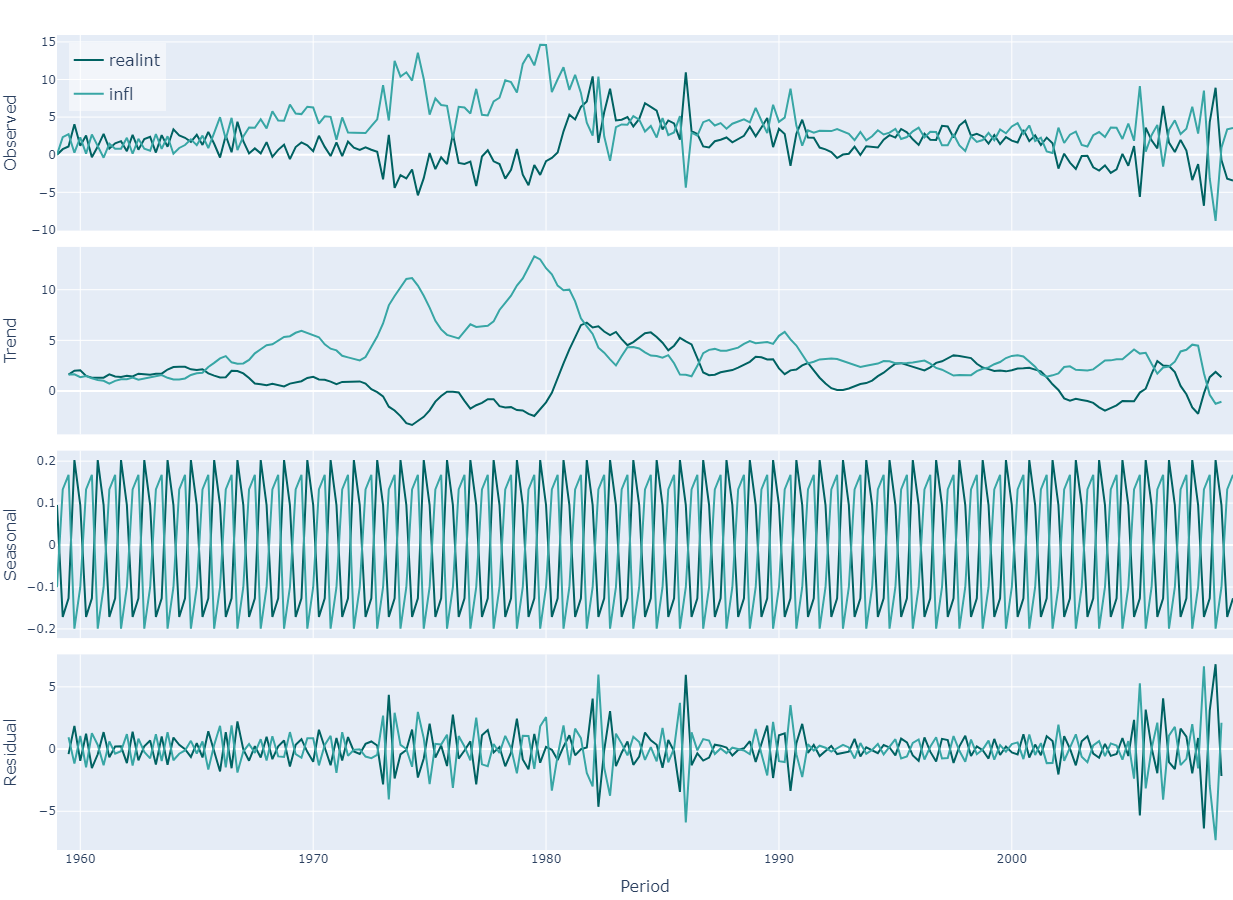

In [5]:
atom.plot_decomposition()

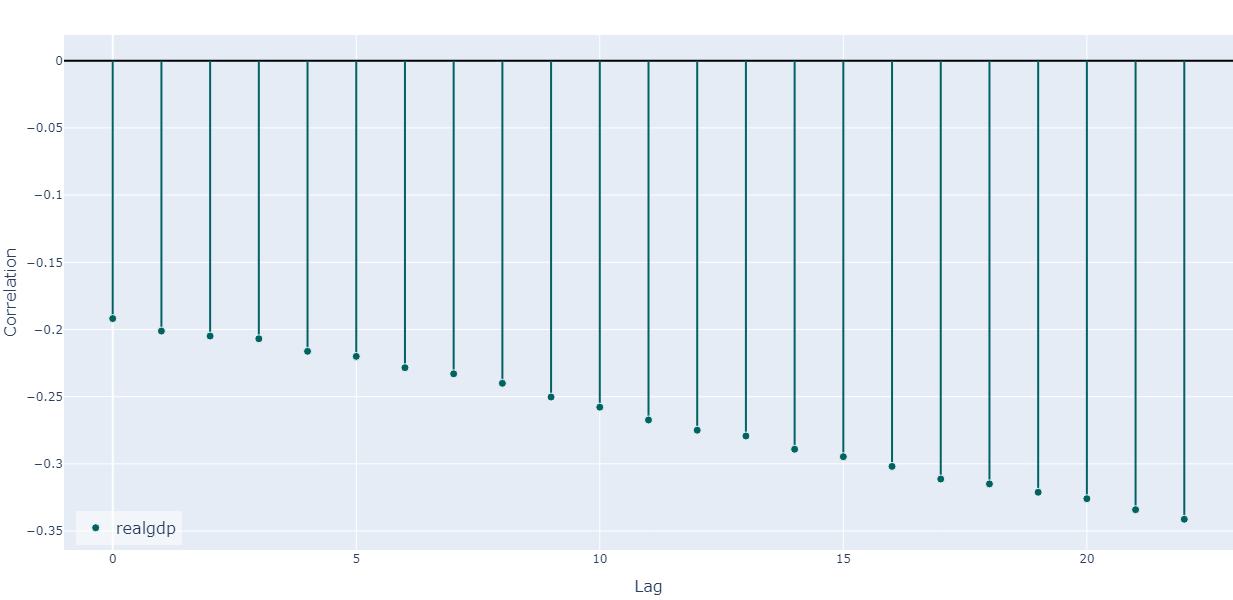

In [6]:
# Plot the correlation of a feature against one of the targets
atom.plot_ccf(columns=0, target=1, legend="lower left")

In [15]:
atom.dataset.apply(lambda x: np.log10(x))

TypeError: loop of ufunc does not support argument 0 of type numpy.ufunc which has no callable log10 method

In [13]:
# Use the apply method to easily transform the data
def apply_log(df):
    df = df.apply(np.log10)

atom.apply(apply_log, feature_names_out="one-to-one")

Fitting FunctionTransformer...


TypeError: loop of ufunc does not support argument 0 of type numpy.ufunc which has no callable log10 method

In [9]:
atom.dataset

realgdp       realcons        realinv       realgovt  \
Period                                                               
1959Q1  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1959Q2  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1959Q3  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1959Q4  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1960Q1  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
...               ...            ...            ...            ...   
2008Q3  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2008Q4  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2009Q1  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2009Q2  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2009Q3  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   

              realdpi            cpi             m1       tbilrate  \
Period                                                               
1959Q1  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1959Q2  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1959Q3  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1959Q4  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
1960Q1  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
...               ...            ...            ...            ...   
2008Q3  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2008Q4  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2009Q1  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2009Q2  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   
2009Q3  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>  <ufunc 'log'>   

                unemp            pop  realint  infl  
Period                                               
1959Q1  <ufunc 'log'>  <ufunc 'log'>     0.00  0.00  
1959Q2  <ufunc 'log'>  <ufunc 'log'>     0.74  2.34  
1959Q3  <ufunc 'log'>  <ufunc 'log'>     1.09  2.74  
1959Q4  <ufunc 'log'>  <ufunc 'log'>     4.06  0.27  
1960Q1  <ufunc 'log'>  <ufunc 'log'>     1.19  2.31  
...               ...            ...      ...   ...  
2008Q3  <ufunc 'log'>  <ufunc 'log'>     4.33 -3.16  
2008Q4  <ufunc 'log'>  <ufunc 'log'>     8.91 -8.79  
2009Q1  <ufunc 'log'>  <ufunc 'log'>    -0.71  0.94  
2009Q2  <ufunc 'log'>  <ufunc 'log'>    -3.19  3.37  
2009Q3  <ufunc 'log'>  <ufunc 'log'>    -3.44  3.56  

[203 rows x 12 columns]

## Run the pipeline

In [8]:
atom.run(["STL", "Prophet", "Croston", "VAR", "BATS"], n_trials=10, verbose=1)


Training ========================= >>
Models: STL, Prophet, Croston, VAR, BATS
Metric: mape


Running hyperparameter tuning for STL...


  0%|          | 0/10 [00:00<?, ?it/s]

[W 2024-02-04 20:35:54,778] Trial 0 failed with parameters: {'seasonal': 7, 'seasonal_deg': 0, 'low_pass_deg': 0, 'robust': False} because of the following error: TypeError('X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Series scitype: [\'pd.Series\', \'pd.DataFrame\', \'np.ndarray\']. , "For Panel scitype: [\'numpy3D\', \'nested_univ\', \'pd-multiindex\', \'df-list\', \'pd-long\']. , "For Hierarchical scitype: [\'pd_mu

  0%|          | 0/10 [00:00<?, ?it/s]

[W 2024-02-04 20:35:54,813] Trial 0 failed with parameters: {'changepoint_prior_scale': 0.0134, 'seasonality_prior_scale': 0.7608, 'holidays_prior_scale': 0.001} because of the following error: TypeError('X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Series scitype: [\'pd.Series\', \'pd.DataFrame\', \'np.ndarray\']. , "For Panel scitype: [\'numpy3D\', \'nested_univ\', \'pd-multiindex\', \'df-list\', \'pd-long\']. , "For

  0%|          | 0/10 [00:00<?, ?it/s]

[W 2024-02-04 20:35:54,837] Trial 0 failed with parameters: {'smoothing': 0.4} because of the following error: TypeError('X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Series scitype: [\'pd.Series\', \'pd.DataFrame\', \'np.ndarray\']. , "For Panel scitype: [\'numpy3D\', \'nested_univ\', \'pd-multiindex\', \'df-list\', \'pd-long\']. , "For Hierarchical scitype: [\'pd_multiindex_hier\']. ').
Traceback (most recent call la

  0%|          | 0/10 [00:00<?, ?it/s]

[W 2024-02-04 20:35:54,860] Trial 0 failed with parameters: {'trend': 'ct', 'ic': 'bic'} because of the following error: TypeError('X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Series scitype: [\'pd.Series\', \'pd.DataFrame\', \'np.ndarray\']. , "For Panel scitype: [\'numpy3D\', \'nested_univ\', \'pd-multiindex\', \'df-list\', \'pd-long\']. , "For Hierarchical scitype: [\'pd_multiindex_hier\']. ').
Traceback (most rece

  0%|          | 0/10 [00:00<?, ?it/s]

[W 2024-02-04 20:35:54,900] Trial 0 failed with parameters: {'use_box_cox': False, 'use_trend': True, 'use_damped_trend': None, 'use_arma_errors': True} because of the following error: TypeError('X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Series scitype: [\'pd.Series\', \'pd.DataFrame\', \'np.ndarray\']. , "For Panel scitype: [\'numpy3D\', \'nested_univ\', \'pd-multiindex\', \'df-list\', \'pd-long\']. , "For Hierarch

RuntimeError: All models failed to run. Use the logger to investigate the exceptions or set parameter errors='raise' to raise the exception.

## Analyze the results

In [ ]:
atom.evaluate()

In [ ]:
atom.winner.plot_forecast()